# Load dataframe

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("path_to_2_stages_df.csv")


# Correlation analysis

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['2_stages'])  # Extract features excluding the label column 'PPG_GM','PPI_GM'

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

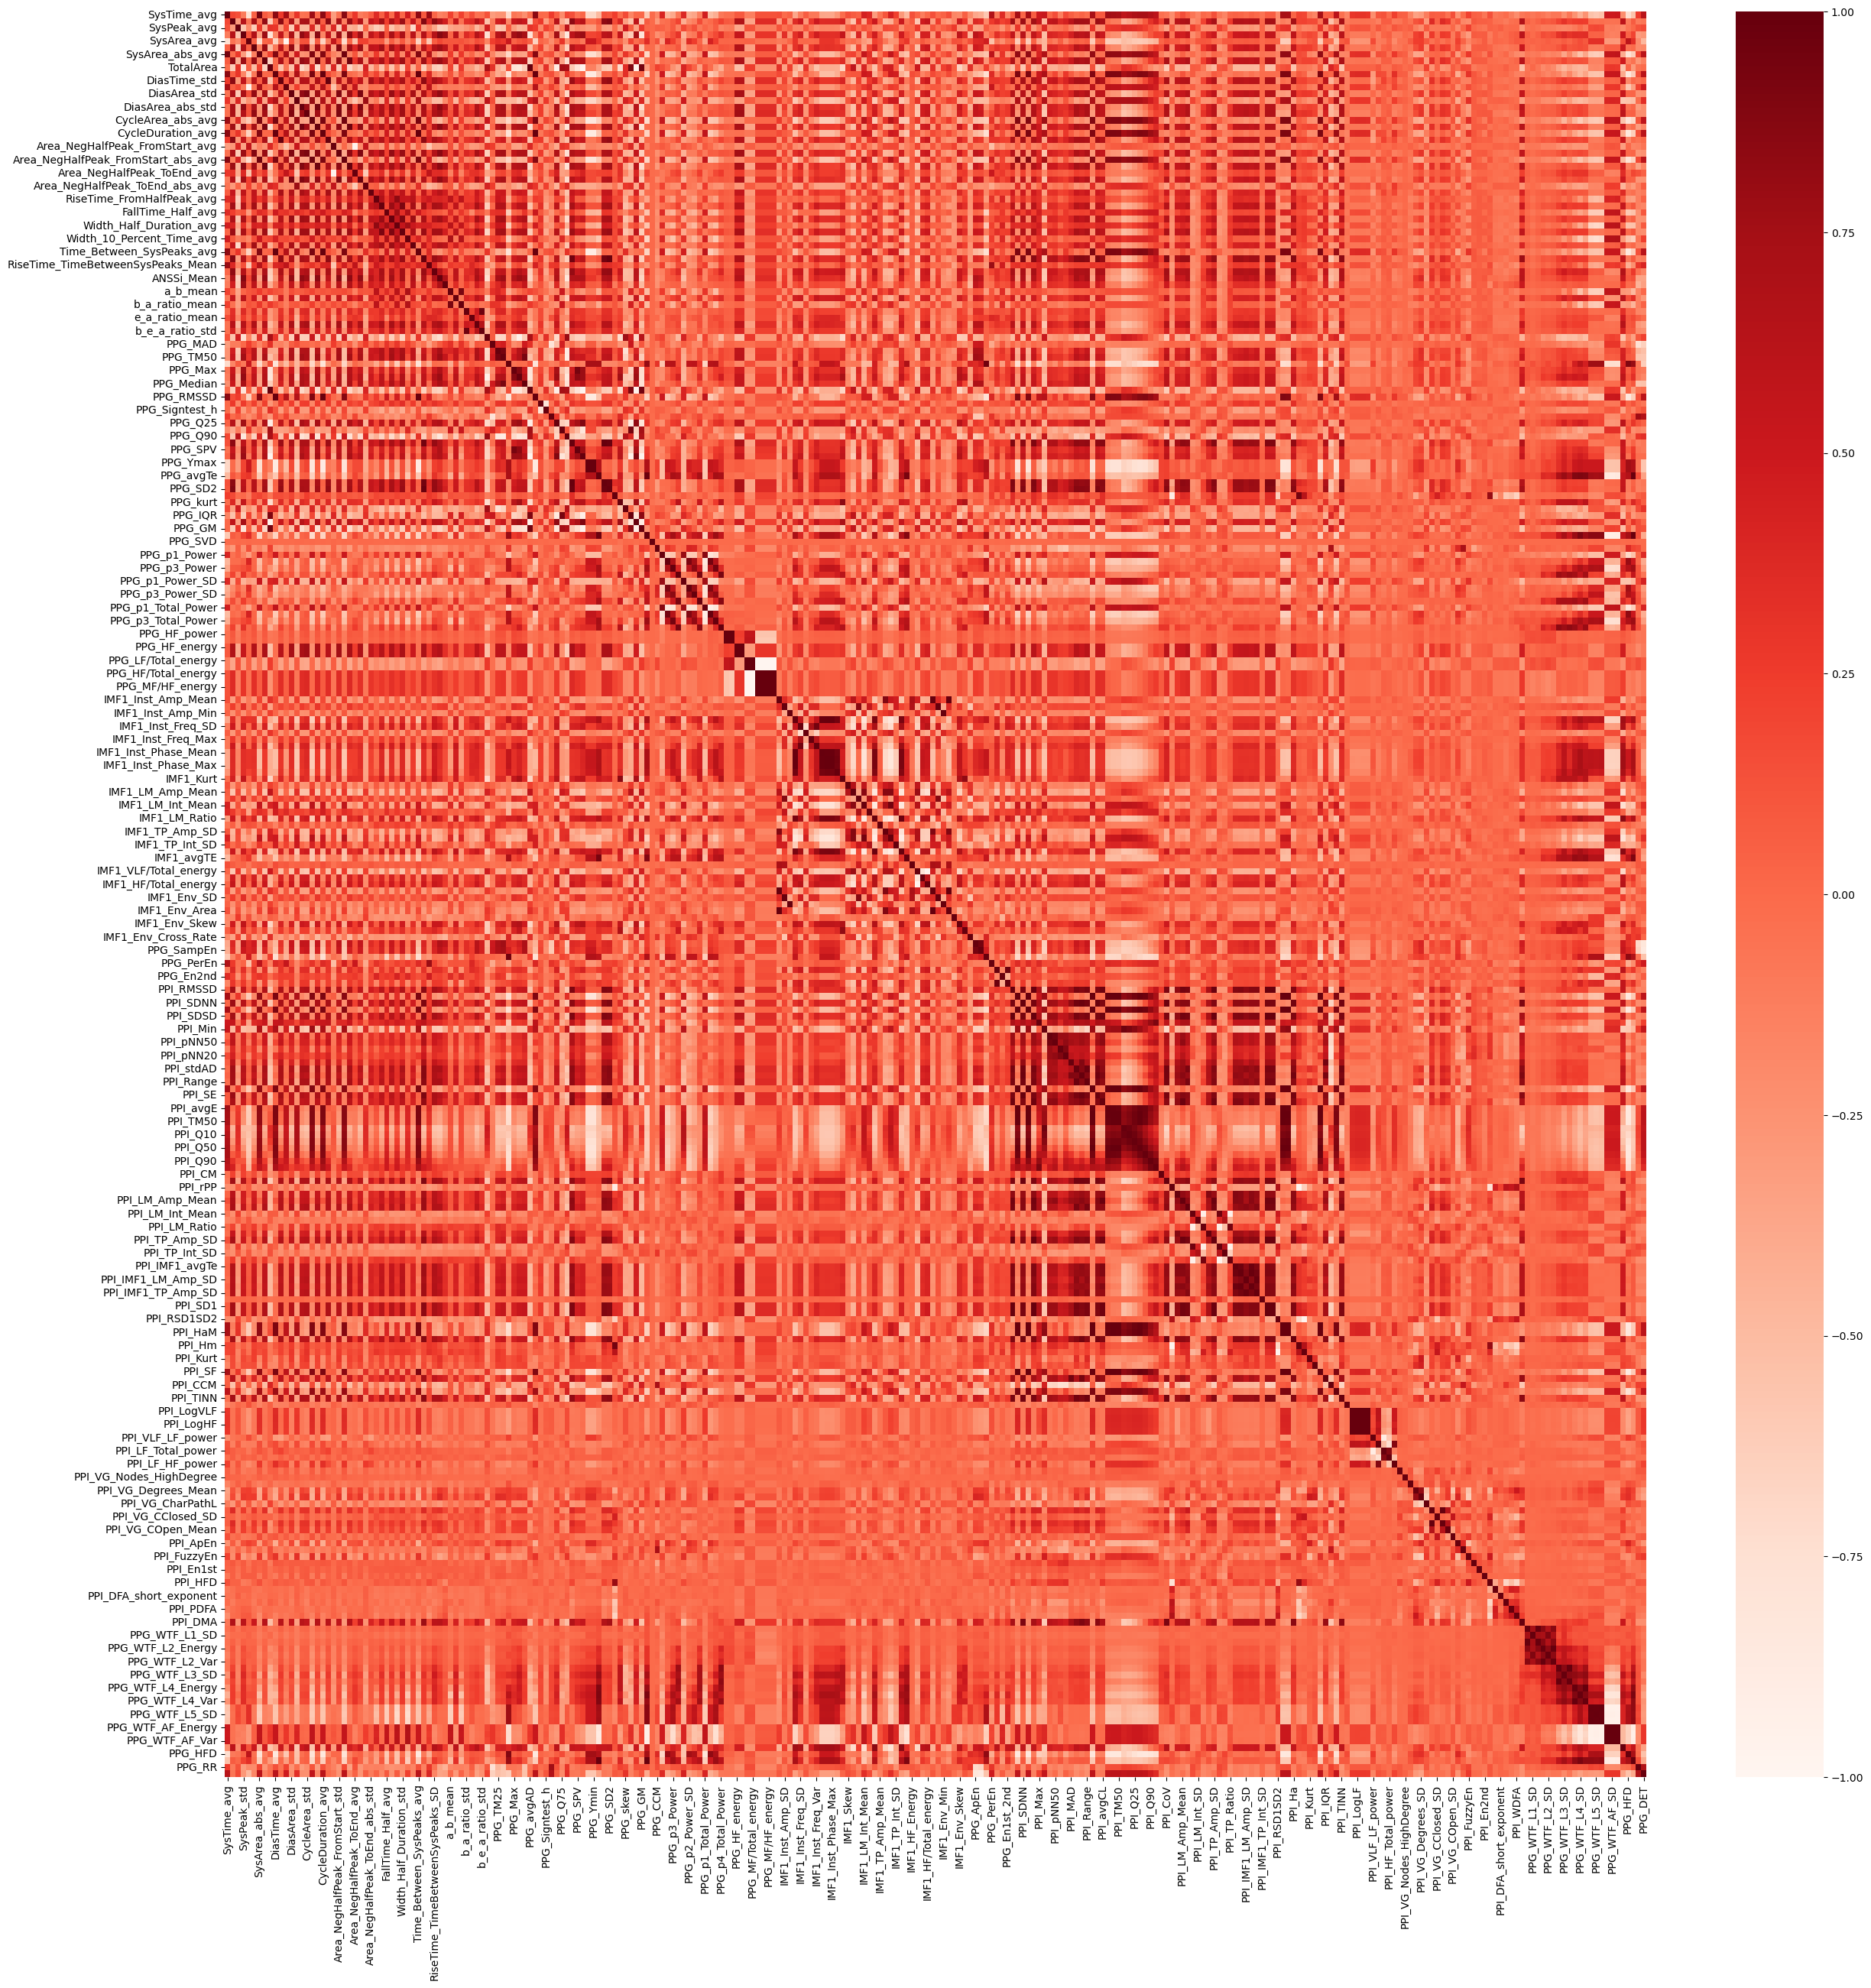

In [20]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [21]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Min', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_CoV', 'PPI_LM_Amp_Mean', 'PPI_TP_Amp_SD', 'PPI_TP_Int_Mean', 'PPI_IMF1_LM_Amp_Mean', 'PPI_IMF1_TP_Amp_Mean', 'PPI_IMF1_TP_Amp_SD', 'PPI_SD1', 

In [22]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [23]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_SD', 'PPI_VG_CharPathL', 'PPI_VG_CClosed_Mean', 'PPI_VG_CClosed_SD', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD', 'PPI_ApEn', 'PPI_SampEn', 'PPI_FuzzyEn', 'PPI_PerEn', 'PPI_En1

In [24]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [25]:
df_revised

,2_stages,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,SysArea_abs_std,TotalArea,...,PPG_WTF_L3_Energy,PPG_WTF_L3_SD,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_WTF_AF_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.285010,20.185956,...,2.630119,0.073414,73.786172,0.544357,469.265490,3326.216471,56.679685,1.596500,0.103262,0.916861
1,0,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.227912,18.963432,...,14.351267,0.171489,124.451367,0.706797,986.855721,2731.753050,59.669821,1.481480,0.100278,0.961463
2,0,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.128348,22.063562,...,2.109012,0.065740,47.301892,0.435842,452.286898,3424.140494,61.623213,1.512300,0.070013,0.889709
3,0,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.272068,21.087311,...,18.348238,0.193904,357.419869,1.197743,748.970794,2720.494751,62.408353,1.531390,0.075477,0.864056
4,0,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.189381,25.268359,...,1.450890,0.054526,51.561563,0.455048,495.221854,3298.400148,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0,0.457332,0.147955,2.894850,0.439800,0.939364,7.744200,0.444941,0.150386,25.575405,...,0.705908,0.038033,12.749257,0.226207,291.749987,3568.318762,50.156012,1.312859,0.086904,0.944182
85538,0,0.418870,0.159254,2.790856,0.775927,3.364588,9.194997,0.412621,0.191717,25.140178,...,0.549422,0.033554,14.531636,0.241577,238.542476,3596.889402,51.241862,1.329070,0.086235,0.943974
85539,0,0.418692,0.121094,2.838916,0.431103,3.748585,6.014400,0.411671,0.143435,25.719602,...,0.758148,0.039415,13.286614,0.230992,255.100137,3622.677753,49.838657,1.319159,0.101377,0.951243
85540,0,0.412946,0.169847,2.848124,0.521313,2.600567,7.562719,0.405593,0.191824,25.362439,...,0.974665,0.044691,13.945365,0.236626,336.559393,3546.296684,50.857749,1.367742,0.084736,0.934705


In [26]:
columns = df_revised.columns

In [27]:
# Convert the list to a DataFrame
df_to_drop = pd.DataFrame(to_drop, columns=['Columns to Drop'])

# Export the DataFrame to a CSV file
df_to_drop.to_csv('columns_to_drop.csv', index=False)

# Prepare X and y

In [ ]:
# Load subjects
df_subjects = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['2_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['2_stages']
groups = df_revised['SubjectID']

# SMOTE balancing

In [31]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]
        
        # Impute missing values
        X_g = imputer.fit_transform(X_g)
        
        smote = SMOTE(random_state=42)
        X_resampled_g, y_resampled_g = smote.fit_resample(X_g, y_g)
        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))  # Convert back to DataFrame to maintain feature names
        resampled_y.append(pd.Series(y_resampled_g))  # Convert back to Series
        resampled_groups.extend([group] * len(y_resampled_g))  # Extend the groups array with the current group repeated for the resampled size

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Usage of the function with sample data
# Assume X, y, and groups are already defined and appropriately prepared
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)



In [34]:
# Get class distribution
label_counts = y_resampled.value_counts()
print(label_counts)

2_stages
0    69786
1    69786
Name: count, dtype: int64


## Feature Selection

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
X_transformed = sfm.fit_transform(X, y)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_feature_names = X.columns[selected_features_mask]

print("Selected features:", selected_feature_names)


Selected features: Index(['SysTime_avg', 'SysPeak_avg', 'SysArea_avg', 'SysArea_std', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg',
       'DiasArea_abs_std', 'CycleArea_std', 'CycleArea_abs_avg',
       'Area_NegHalfPeak_FromStart_avg', 'Area_NegHalfPeak_FromStart_std',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'a_b_mean', 'a_b_std',
       'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std',
       'PPG_Min', 'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_avgCL', 'PPG_Median',
       'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_stdAD', 'PPG_kurt', 'PPG_skew',
       'PPG_IQR', 'PPG_SF', 'PPG_GM', '

In [41]:
X_selected = X_resampled[selected_feature_names]

In [42]:
X_selected

,SysTime_avg,SysPeak_avg,SysArea_avg,SysArea_std,TotalArea,DiasTime_avg,DiasArea_avg,DiasArea_std,DiasArea_abs_avg,DiasArea_abs_std,...,PPI_Min,PPI_Q90,PPI_Skew,PPI_SVD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_HFD,PPG_DET
0,0.243075,2.051287,-1.285312,14.791261,20.185956,0.665483,1.261417,20.293817,0.259398,0.260488,...,554.687500,704.687500,4.046943,4342.028380,1.041127,73.786172,0.544357,56.679685,1.596500,0.916861
1,0.343277,1.927268,2.661957,17.248446,18.963432,0.897964,-2.347344,27.929675,0.350208,0.541831,...,546.875000,1050.781250,1.724040,4368.549933,1.191702,124.451367,0.706797,59.669821,1.481480,0.961463
2,0.274200,2.242864,0.956881,15.603188,22.063562,0.709604,-0.729983,35.908480,0.321099,0.218349,...,531.250000,750.000000,1.124599,4421.909507,0.566286,47.301892,0.435842,61.623213,1.512300,0.889709
3,0.437240,2.824896,-1.905432,15.568619,21.087311,0.984896,2.499454,29.642914,0.399883,0.347446,...,390.625000,1353.125000,0.958315,4108.364895,0.691065,357.419869,1.197743,62.408353,1.531390,0.864056
4,0.274282,2.913433,1.484555,19.700900,25.268359,0.757390,-1.118548,11.035044,0.390905,0.121759,...,648.437500,750.000000,3.470733,4159.743597,1.272573,51.561563,0.455048,56.876811,1.638568,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139567,0.389313,2.823830,5.644674,9.449422,24.766050,1.068970,-4.046852,12.667402,0.501494,0.159085,...,681.861133,1376.421375,0.024387,5263.887672,0.775276,28.756164,0.332605,53.317711,1.347607,0.941737
139568,0.425767,2.850179,3.006788,6.649881,25.471237,1.057603,-3.427218,12.017052,0.482825,0.112171,...,726.723477,1294.951502,0.025143,5287.787065,0.634063,18.626455,0.271805,49.624384,1.333652,0.942538
139569,0.383006,2.872689,1.614618,8.624201,24.646474,1.061521,-1.604229,15.215746,0.516740,0.159897,...,689.594078,1369.458647,0.020657,5504.848911,0.809742,30.220576,0.345933,54.631685,1.361339,0.940017
139570,0.368873,2.387617,0.261864,29.325789,20.383009,1.019598,-0.690256,22.890702,0.405951,0.216108,...,681.686495,1310.592745,0.453643,5273.846773,0.443807,27.153491,0.329512,54.316661,1.377962,0.960440


## Hyperparameter tuning

### RandomSearch with 50% of data

In [43]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}
# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.271 total time= 1.3min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.354 total time= 1.3min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.289 total time= 1.3min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=12, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=199;, score=0.280 total time= 1.7min
[CV 1/3] END classifier__bootstrap=F

### Gridsearch with 100% of data

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on the results of random search 
param_grid_rf = {
    'classifier__bootstrap': [True, False],
    'classifier__max_depth': [None, 2],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [5, 6],
    'classifier__min_samples_split': [4, 5, 6],
    'classifier__n_estimators': [350, 483, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_resampled, y_resampled, groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_resampled, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=5, classifier__min_samples_split=4, classifier__n_estimators=350;, score=0.542 total time=11.5min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=5, classifier__min_samples_split=4, classifier__n_estimators=350;, score=0.606 total time=11.7min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=5, classifier__min_samples_split=4, classifier__n_estimators=350;, score=0.530 total time=11.8min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=5, classifier__min_samples_split=4, classifier__n_estimators=483;, score=0.543 total time=15.9min
[CV 3/3] END classifier__boots

# Model Training

## 5-fold CV

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=6,
    min_samples_split=4,
    n_estimators=483,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_5cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
0    13632
1    13632
Name: count, dtype: int64
Test set distribution: 2_stages
0    14061
1    14061
Name: count, dtype: int64
Test set distribution: 2_stages
0    14061
1    14061
Name: count, dtype: int64
Test set distribution: 2_stages
0    13987
1    13987
Name: count, dtype: int64
Test set distribution: 2_stages
0    14045
1    14045
Name: count, dtype: int64
Accuracy       0.647290
Sensitivity    0.853343
Specificity    0.441238
Precision      0.606938
F1 Score       0.707727
MCC            0.325338
dtype: float64
Accuracy       0.034907
Sensitivity    0.054462
Specificity    0.106977
Precision      0.033259
F1 Score       0.018430
MCC            0.058459
dtype: float64
Final Confusion Matrix:
 [[30842 38944]
 [10252 59534]]
Overall Accuracy: 0.64752242570143
Overall Sensitivity (Recall): 0.8530937437308342
Overall Specificity: 0.4419511076720259
Overall Precision: 0.6045411157822052
Overall F1 Score: 0.7076261113488328
Overall MCC: 1.279180083107

/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_1892/4221184658.py:98: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


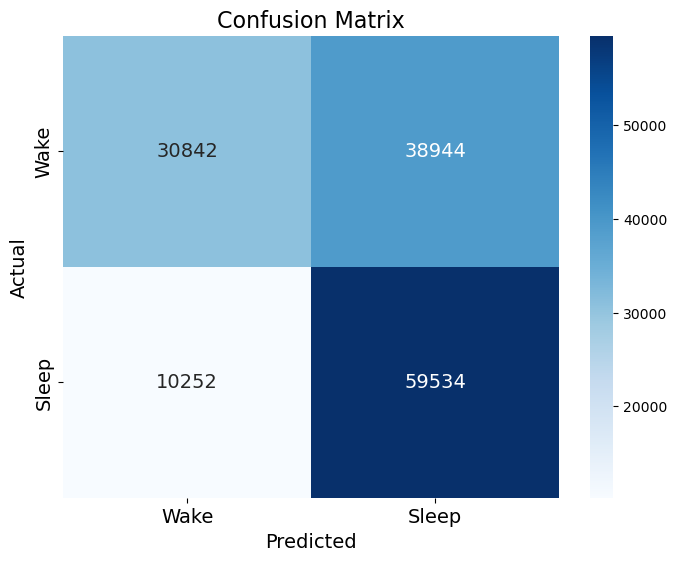

In [50]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

Top 10 Most Important Features:
                              Feature  Importance
43                           PPG_skew    0.024431
17          RiseTime_FromHalfPeak_std    0.022028
30                     e_a_ratio_mean    0.021853
65                          PPG_En1st    0.021822
34                           PPG_TM25    0.019417
56                IMF1_Inst_Freq_Mean    0.019266
66                          PPG_En2nd    0.017466
31                      e_a_ratio_std    0.017376
21            Width_Half_Duration_std    0.016834
59                     IMF1_TP_Int_SD    0.015348
16          RiseTime_FromHalfPeak_avg    0.015120
29                      b_a_ratio_std    0.015119
19                  FallTime_Half_std    0.015100
22          Width_10_Percent_Time_avg    0.014958
48                       PPG_p4_Power    0.014784
75                             PPG_LC    0.014629
68                            PPI_Min    0.014520
32                            PPG_Min    0.014517
55                

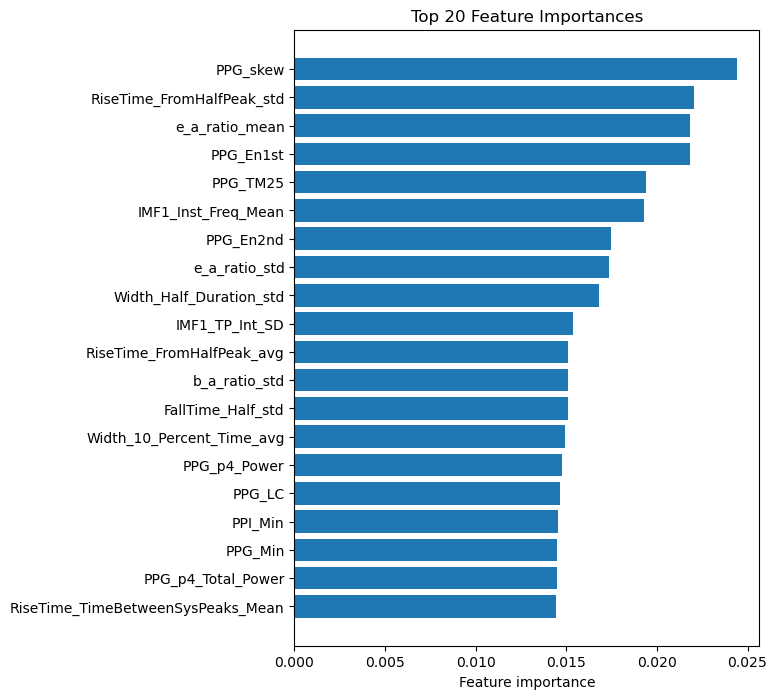

In [51]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_5cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Print the top 20 most important features
print("top 20 Most Important Features:")
print(importance_df_5cv)

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_5cv['Feature'], importance_df_5cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## 10-fold CV

In [55]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Accuracy       0.643194
Sensitivity    0.849463
Specificity    0.436925
Precision      0.602587
F1 Score       0.704057
MCC            0.316498
dtype: float64
Accuracy       0.029157
Sensitivity    0.051269
Specificity    0.073958
Precision      0.025414
F1 Score       0.022396
MCC            0.058395
dtype: float64
Final Confusion Matrix:
 [[30487 39299]
 [10491 59295]]
Overall Accuracy: 0.6432665577623019
Overall Sensitivity (Recall): 0.8496689880491789
Overall Specificity: 0.43686412747542486
Overall Precision: 0.6014057650566972
Overall F1 Score: 0.704299798075781
Overall MCC: 1.258583205438073


/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_1892/2470574914.py:83: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


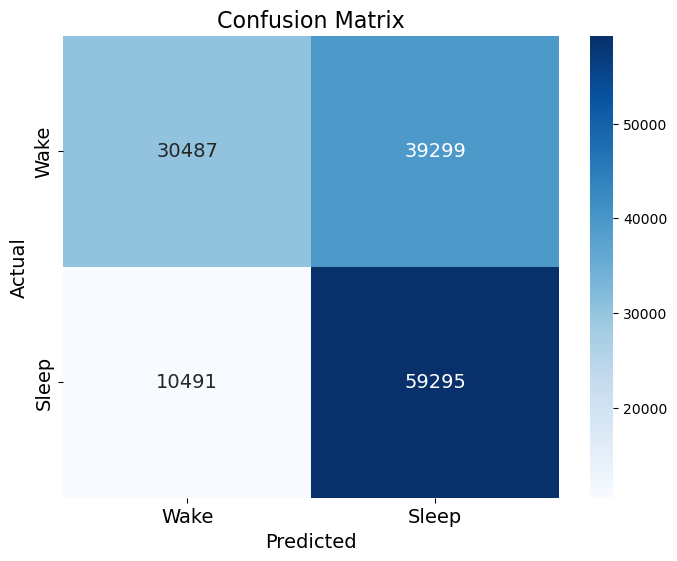

In [56]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

Top 10 Most Important Features:
                              Feature  Importance
43                           PPG_skew    0.022230
56                IMF1_Inst_Freq_Mean    0.020584
68                            PPI_Min    0.020394
30                     e_a_ratio_mean    0.020273
17          RiseTime_FromHalfPeak_std    0.020161
66                          PPG_En2nd    0.018176
65                          PPG_En1st    0.018021
31                      e_a_ratio_std    0.017539
21            Width_Half_Duration_std    0.017267
32                            PPG_Min    0.016257
34                           PPG_TM25    0.016207
75                             PPG_LC    0.015401
24  RiseTime_TimeBetweenSysPeaks_Mean    0.015368
19                  FallTime_Half_std    0.015345
22          Width_10_Percent_Time_avg    0.015222
59                     IMF1_TP_Int_SD    0.015121
26                           a_b_mean    0.014860
28                     b_a_ratio_mean    0.014760
72                

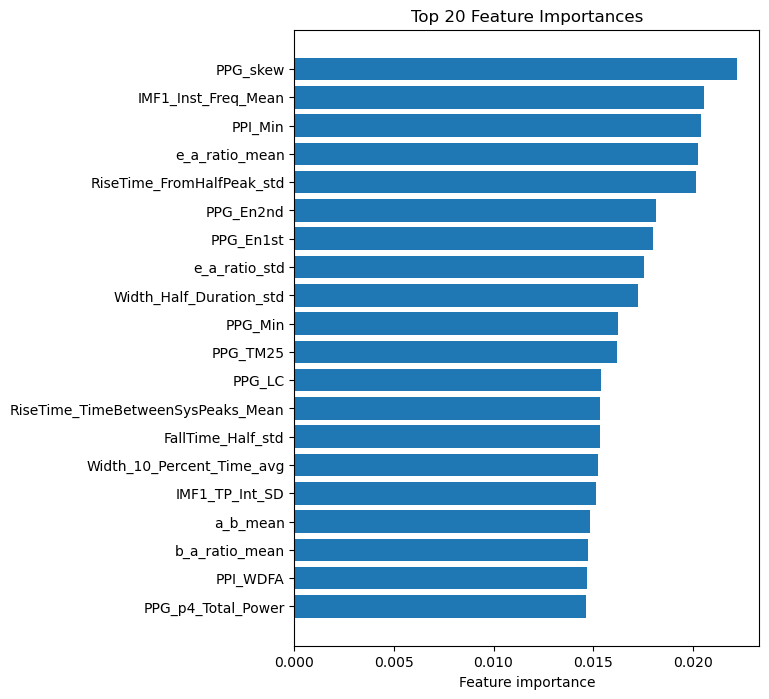

In [57]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances_cv10 = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_10cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv10
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Print the top 20 most important features
print("top 20 Most Important Features:")
print(importance_df_10cv)

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_10cv['Feature'], importance_df_10cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

## 20-fold CV

In [61]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())
    
    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Test set distribution: 2_stages
0    3389
1    3389
Name: count, dtype: int64
Test set distribution: 2_stages
0    3441
1    3441
Name: count, dtype: int64
Test set distribution: 2_stages
0    3438
1    3438
Name: count, dtype: int64
Test set distribution: 2_stages
0    3440
1    3440
Name: count, dtype: int64
Test set distribution: 2_stages
0    3440
1    3440
Name: count, dtype: int64
Test set distribution: 2_stages
0    3433
1    3433
Name: count, dtype: int64
Test set distribution: 2_stages
0    3427
1    3427
Name: count, dtype: int64
Test set distribution: 2_stages
0    3416
1    3416
Name: count, dtype: int64
Test set distribution: 2_stages
0    3422
1    3422
Name: count, dtype: int64
Test set distribution: 2_stages
0    3442
1    3442
Name: count, dtype: int64
Test set distribution: 2_stages
0    3417
1    3417
Name: count, dtype: int64
Test set distribution: 2_stages
0    3810
1    3810
Name: count, dtype: int64
Test set distribution: 2_stages
0    3417
1    3417
Name: count,

/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_1892/1380443704.py:85: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


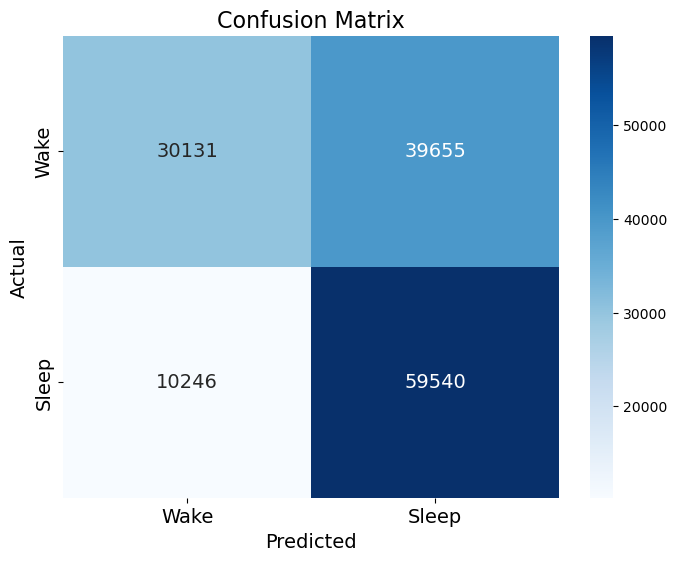

In [62]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

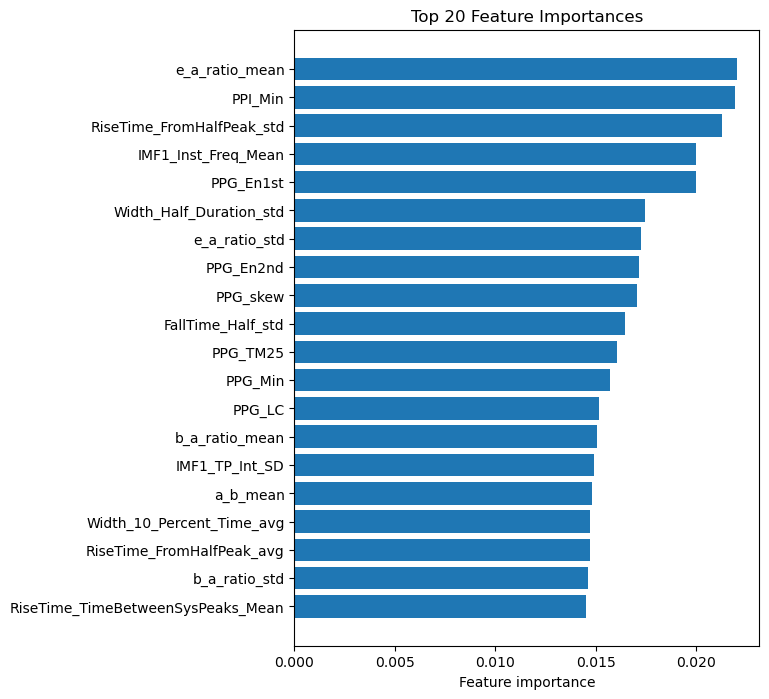

In [63]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_20cv = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_20cv['Feature'], importance_df_20cv['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Overall feature importances

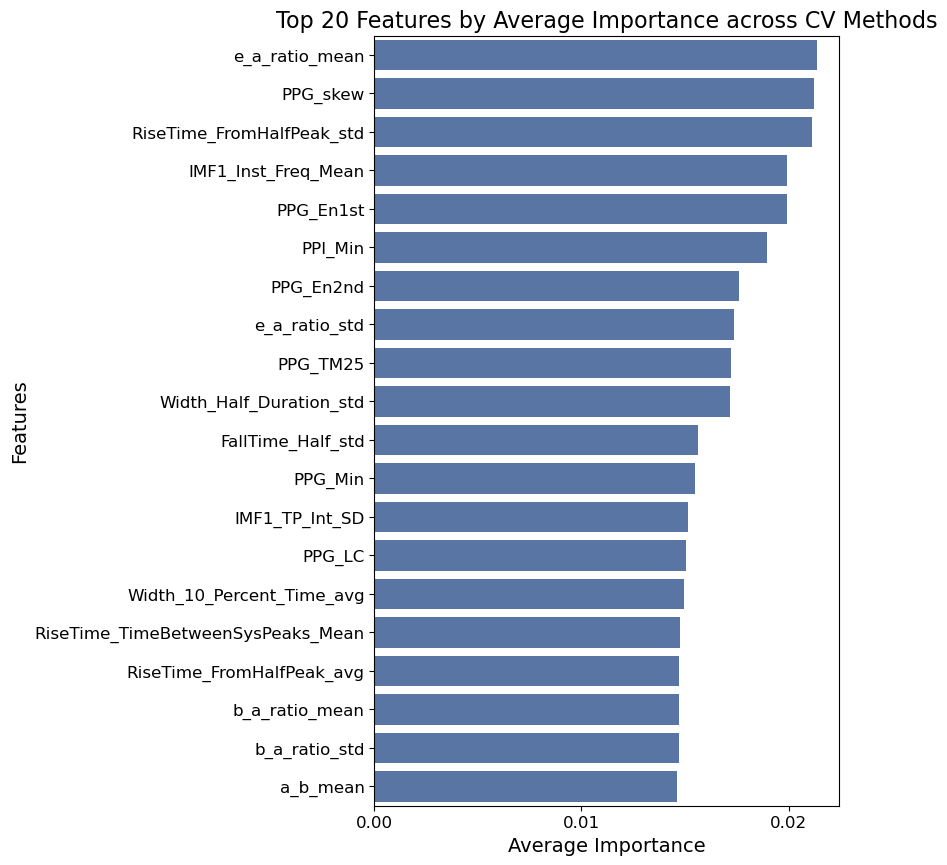

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure DataFrames are aligned by features, assuming 'Feature' is the index or make it the index
#importance_df_10cv.set_index('Feature', inplace=True)
#importance_df_5cv.set_index('Feature', inplace=True)
#importance_df_20cv.set_index('Feature', inplace=True)

# Check and order the indices if necessary
aligned_index = sorted(importance_df_10cv.index)  # Ensure all DataFrames have the same index in the same order
importance_df_10cv = importance_df_10cv.loc[aligned_index]
importance_df_5cv = importance_df_5cv.loc[aligned_index]
importance_df_20cv = importance_df_20cv.loc[aligned_index]

# Concatenate along axis=1 and calculate the mean importance across the three DataFrames
mean_importance_df = pd.concat([importance_df_10cv, importance_df_5cv, importance_df_20cv], axis=1).mean(axis=1)

# Reset the index to turn the features back into a column
mean_importance_df = mean_importance_df.reset_index().rename(columns={0: 'Importance', 'index': 'Feature'})

# Sort the DataFrame by importance and take the top 20 features
top_20_features = mean_importance_df.nlargest(20, 'Importance')

# Get the default Seaborn "deep" palette blue
default_blue = sns.color_palette("deep")[0]

# Now, plot the barplot of the top 20 features
plt.figure(figsize=(6, 10))
barplot = sns.barplot(data=top_20_features, x='Importance', y='Feature', color=default_blue)

# Adding plot details
plt.title('Top 20 Features by Average Importance across CV Methods', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)
# Set x-ticks to be less dense
plt.locator_params(axis='x', nbins=4)  # Adjust the number of bins to your preference

plt.xticks(fontsize=12)  # Rotate x-ticks for better visibility

# Show the plot
plt.show()


In [34]:
top_20_feature_names = ['e_a_ratio_mean', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'IMF1_Inst_Freq_Mean', 'PPG_En1st', 'PPI_Min', 'PPG_En2nd', 'e_a_ratio_std', 'PPG_TM25', 'Width_Half_Duration_std', 'FallTime_Half_std', 'PPG_Min']

/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_3583/2848583521.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = y_resampled # Add the class labels


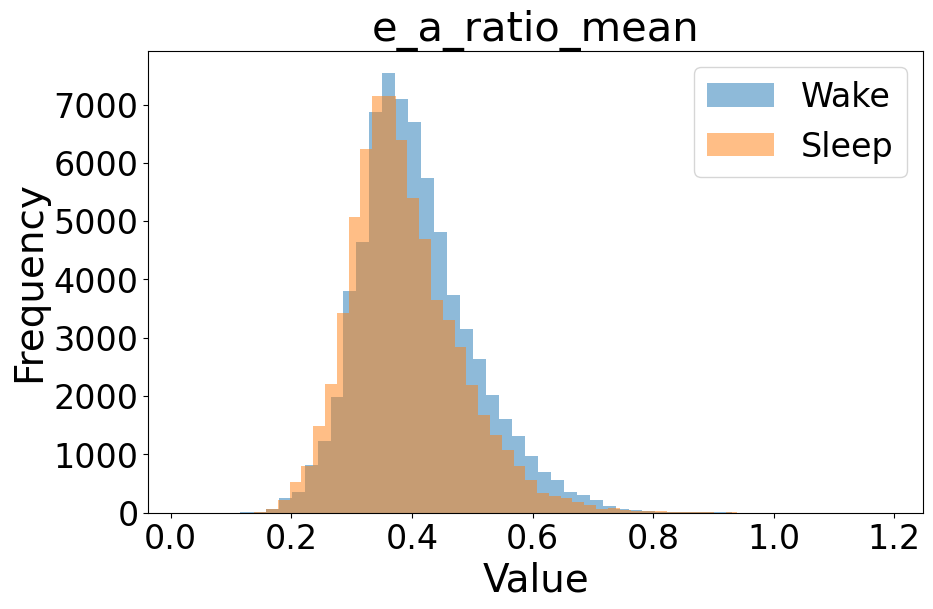

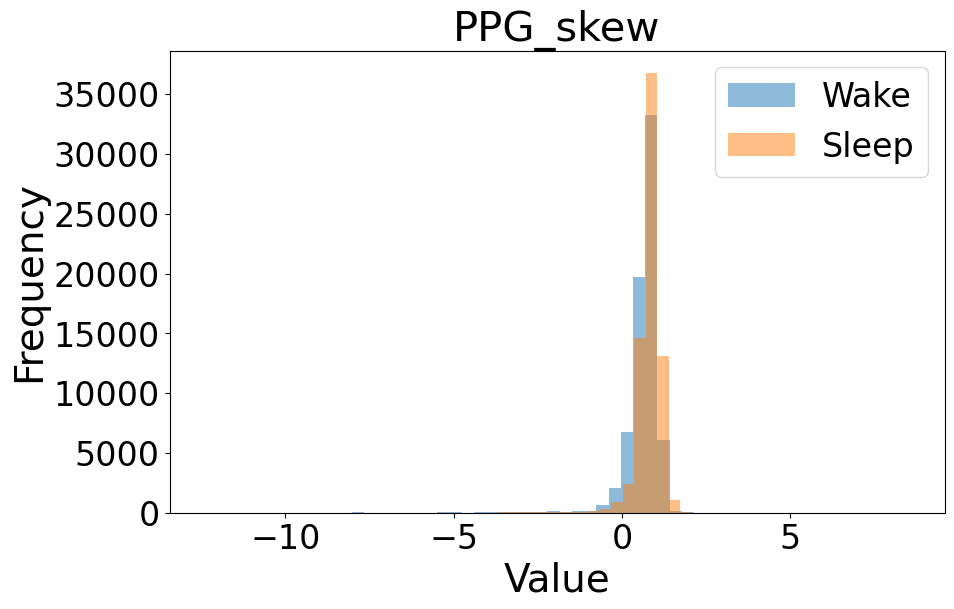

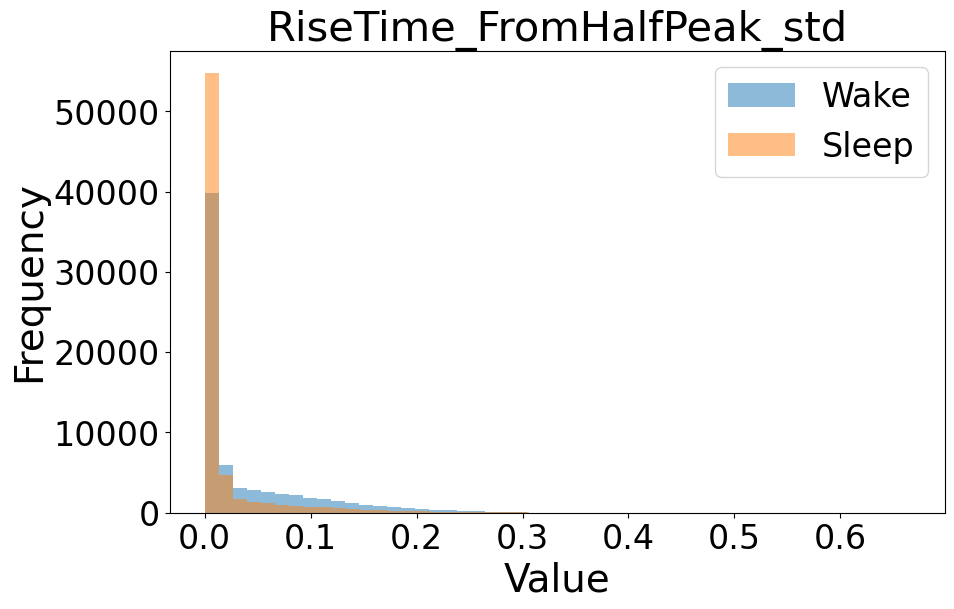

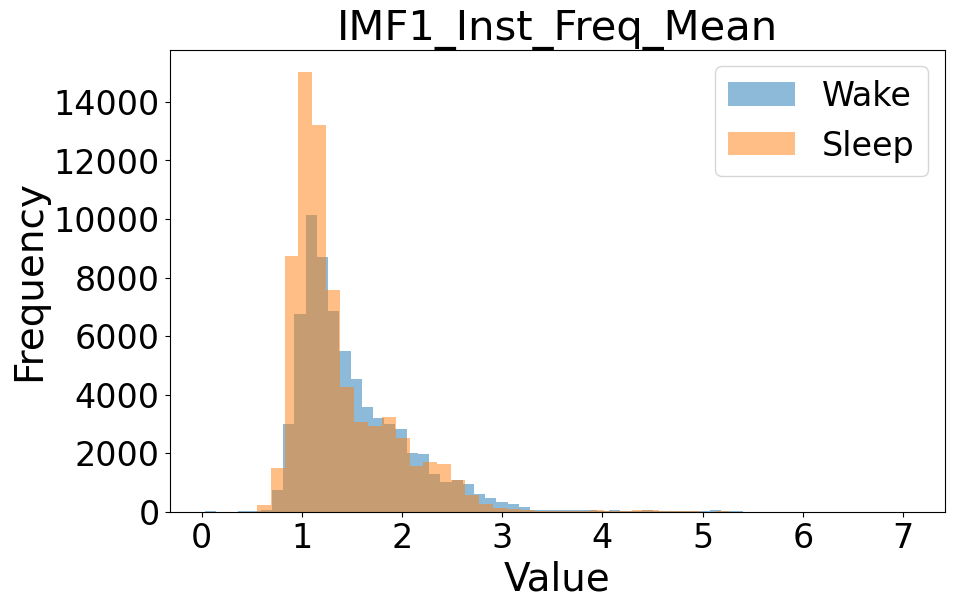

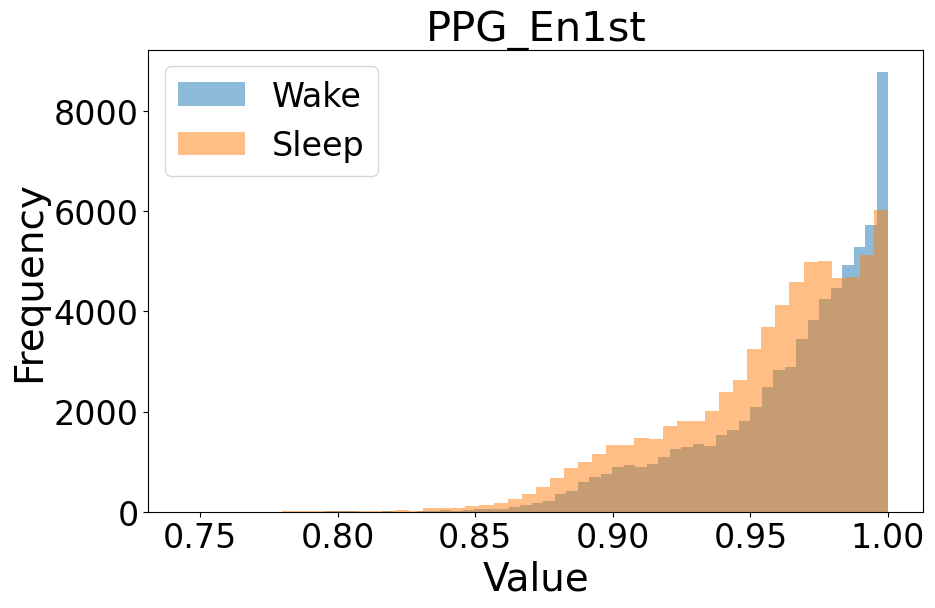

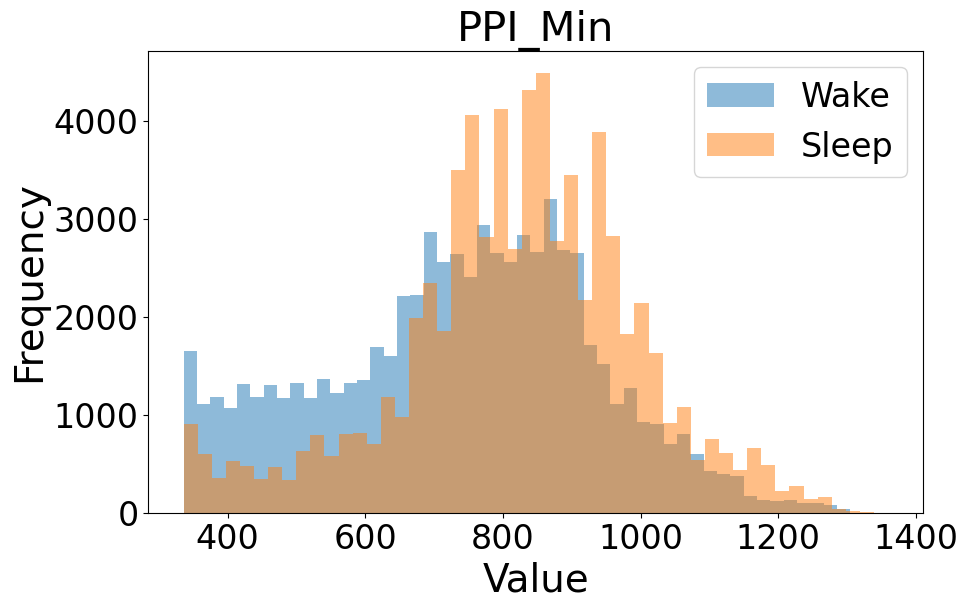

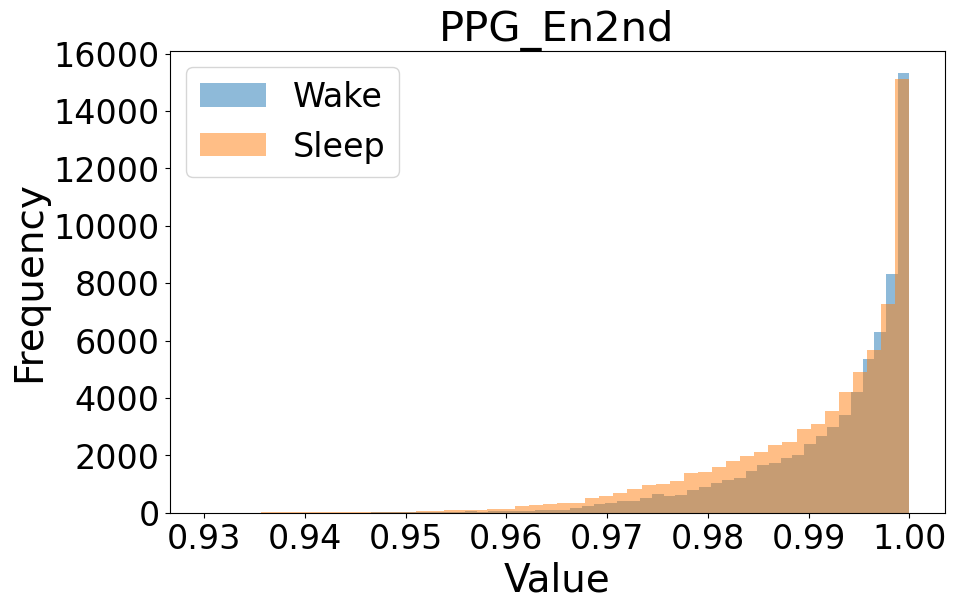

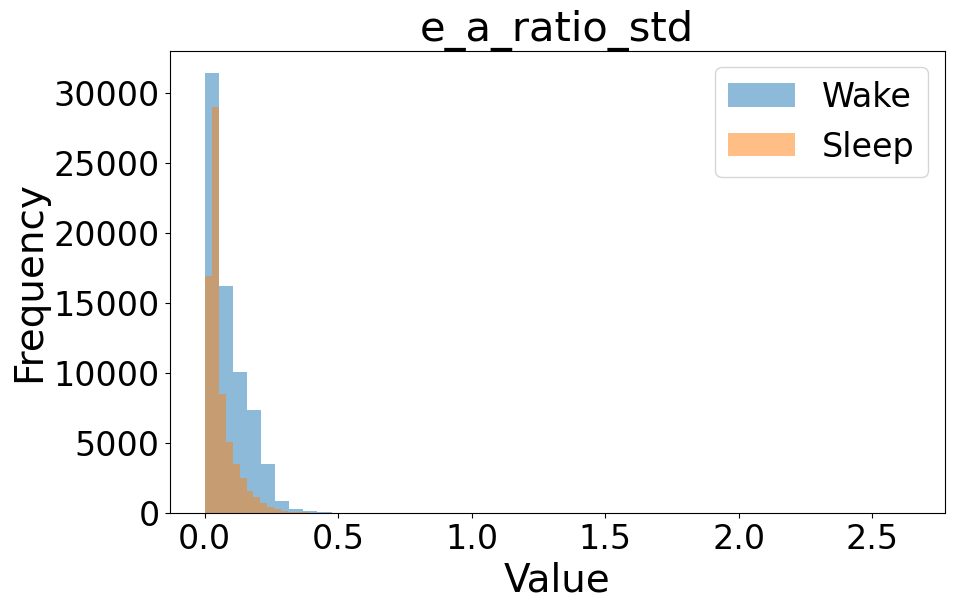

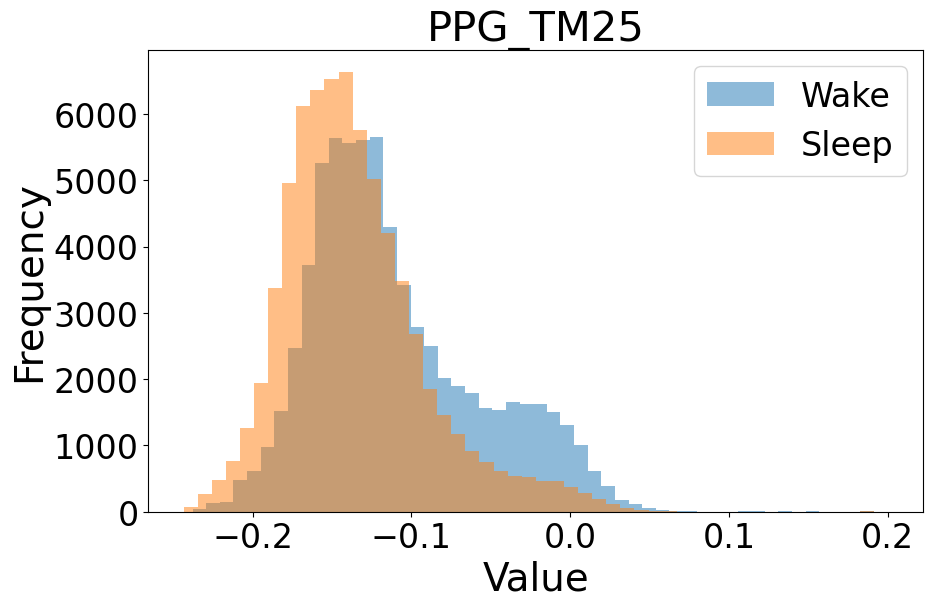

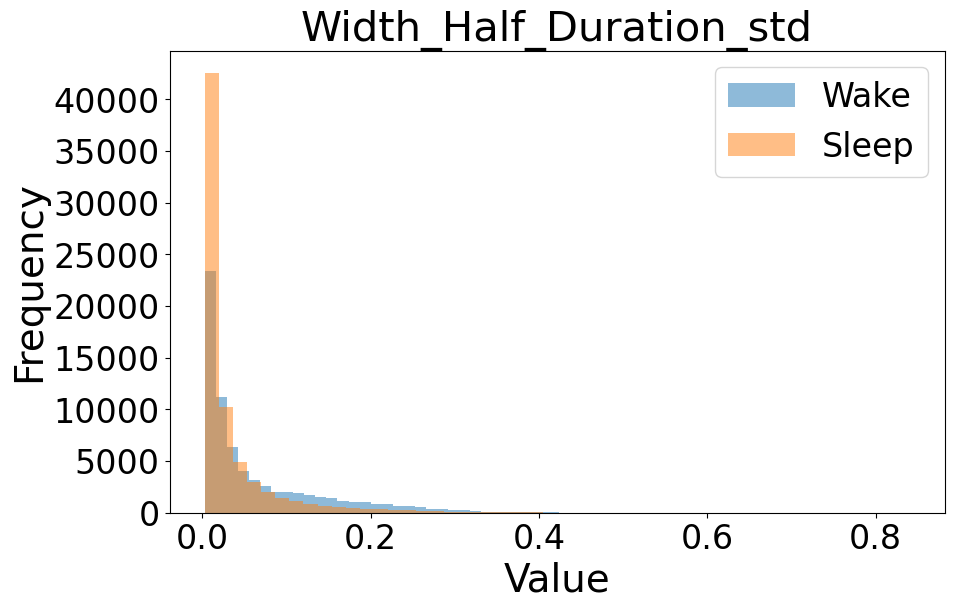

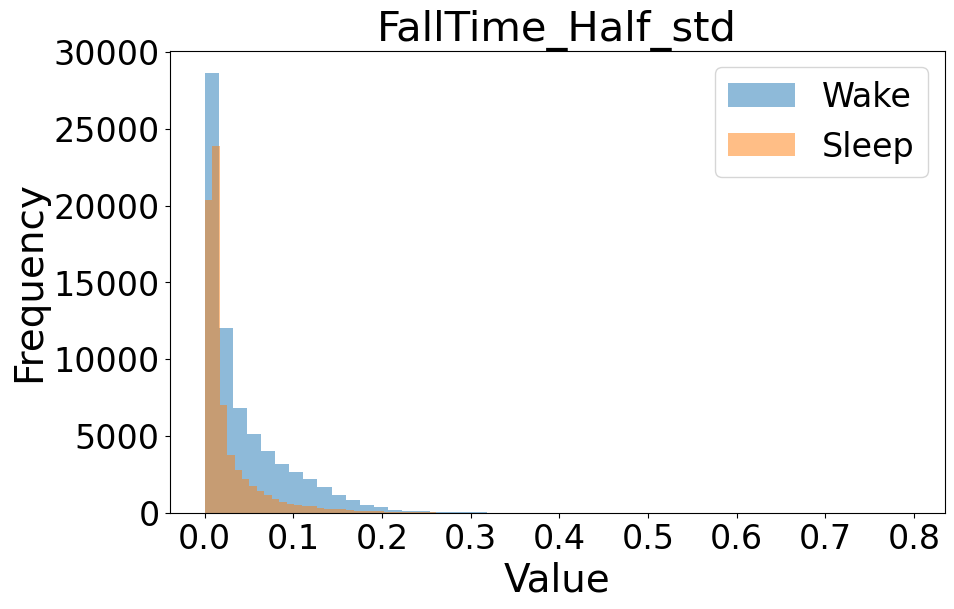

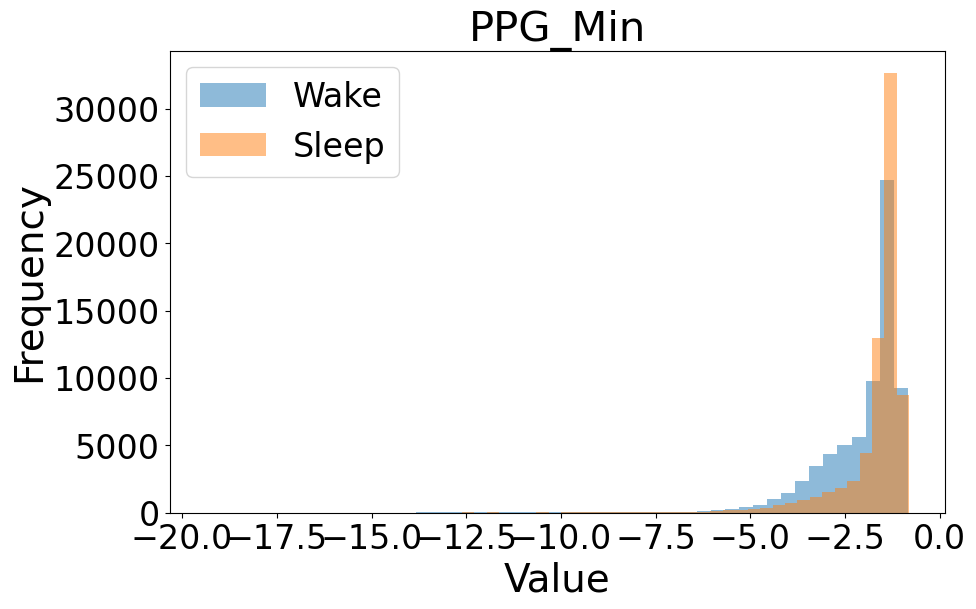

In [35]:
#top_20_feature_names = top_20_features['Feature'].tolist()

# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "Sleep",
}

# Select top 20 features from X_selected
X_selected_top_20 = X_selected[top_20_feature_names]

# Plot histograms for each feature
X_selected_top_20['class'] = y_resampled # Add the class labels

feature_names = top_20_feature_names
for feature in feature_names:  # Exclude the 'class' column
    plt.figure(figsize=(10, 6))
    for class_value in np.unique(y):  # Handles any number of classes
        subset = X_selected_top_20[X_selected_top_20['class'] == class_value]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', fontsize = 30)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.xticks (fontsize = 24)
    plt.yticks (fontsize = 24)
    plt.legend(fontsize = 24)
    plt.show()

/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_3583/729482077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = y_resampled
/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_3583/729482077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = X_selected_top_20['class'].map(class_mapping)


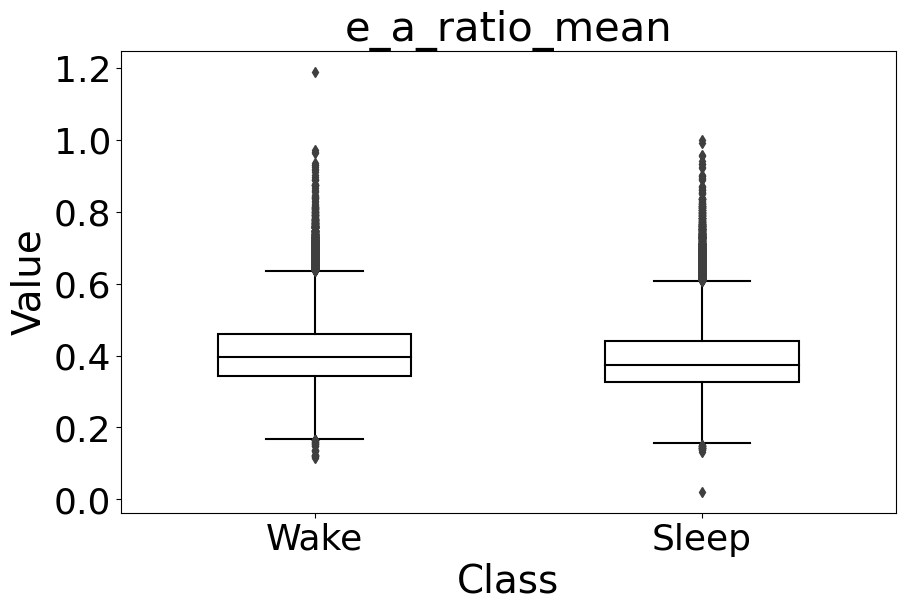

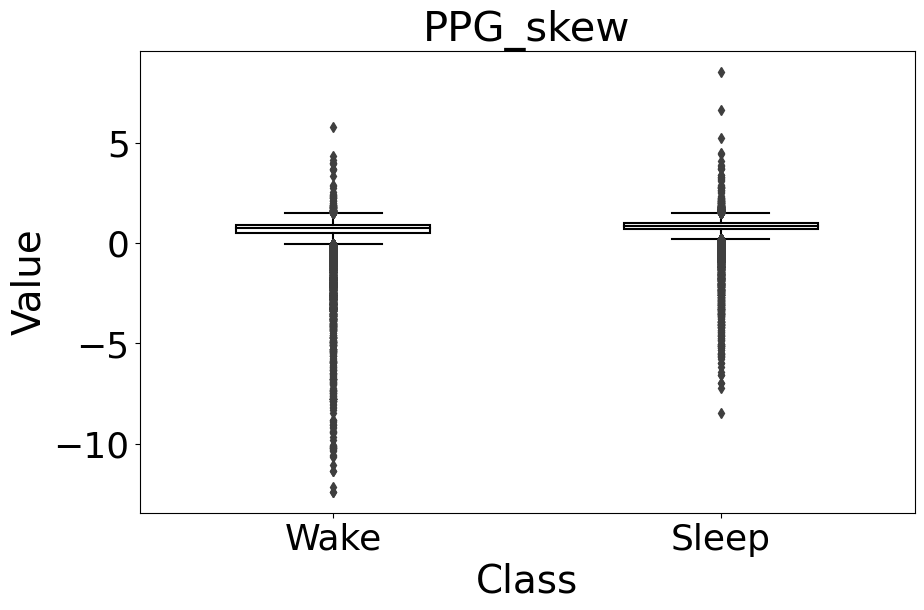

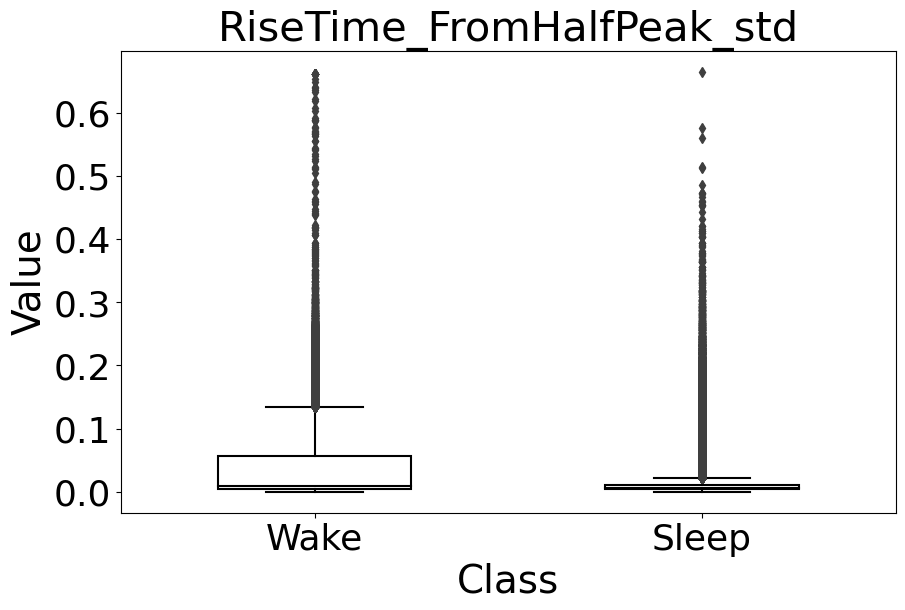

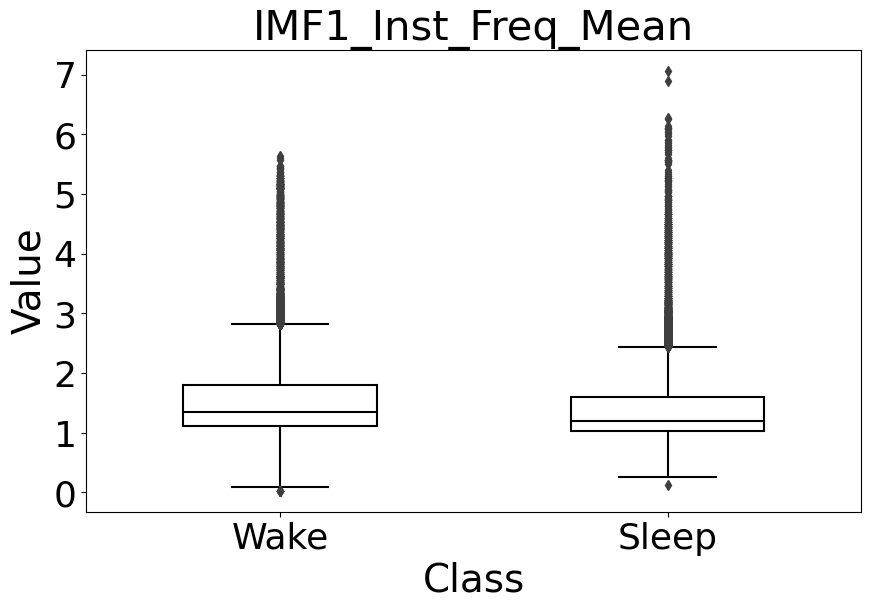

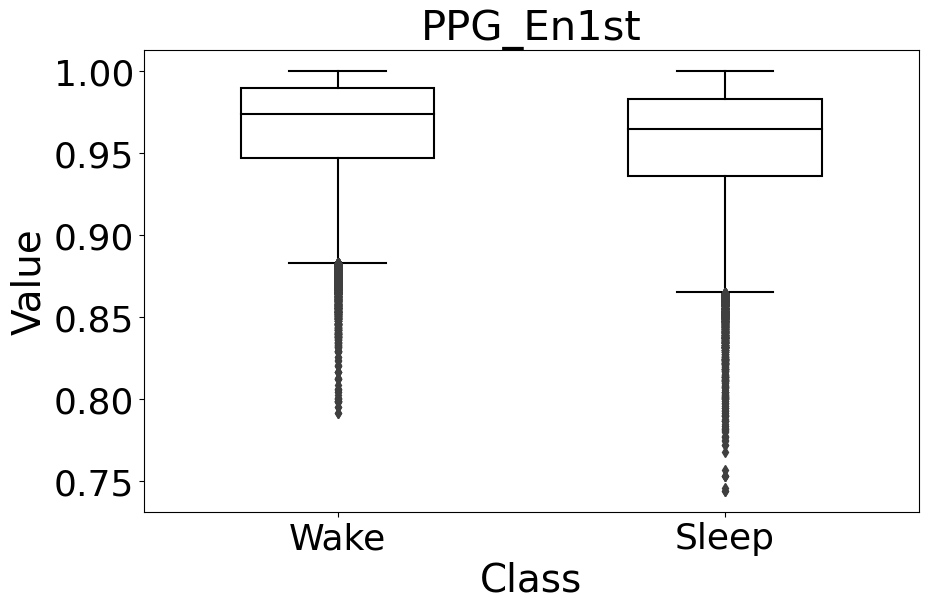

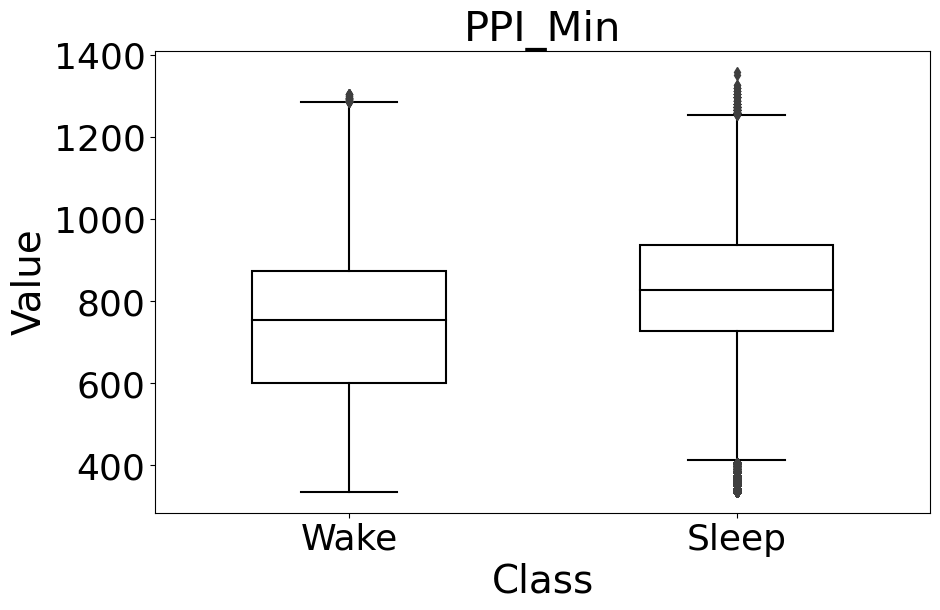

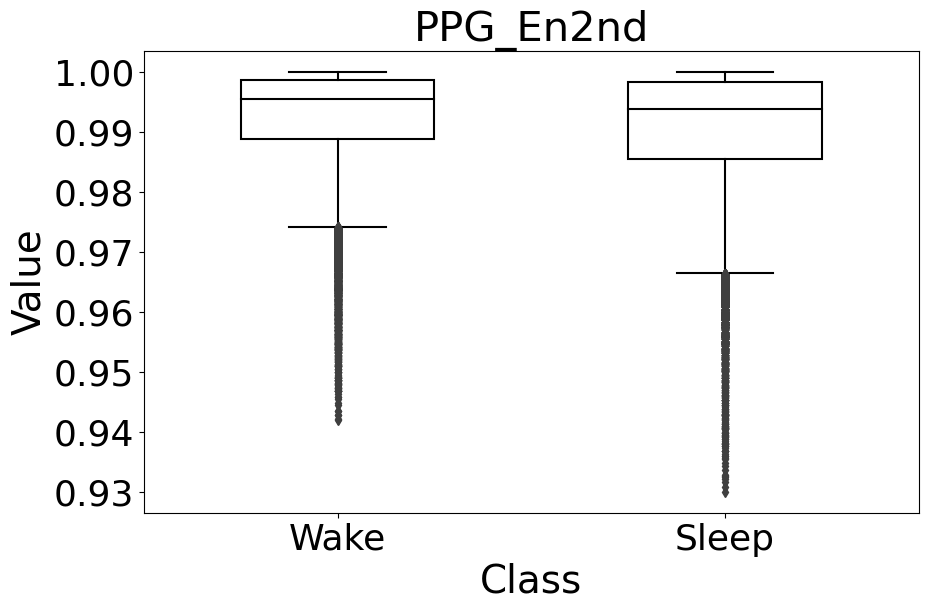

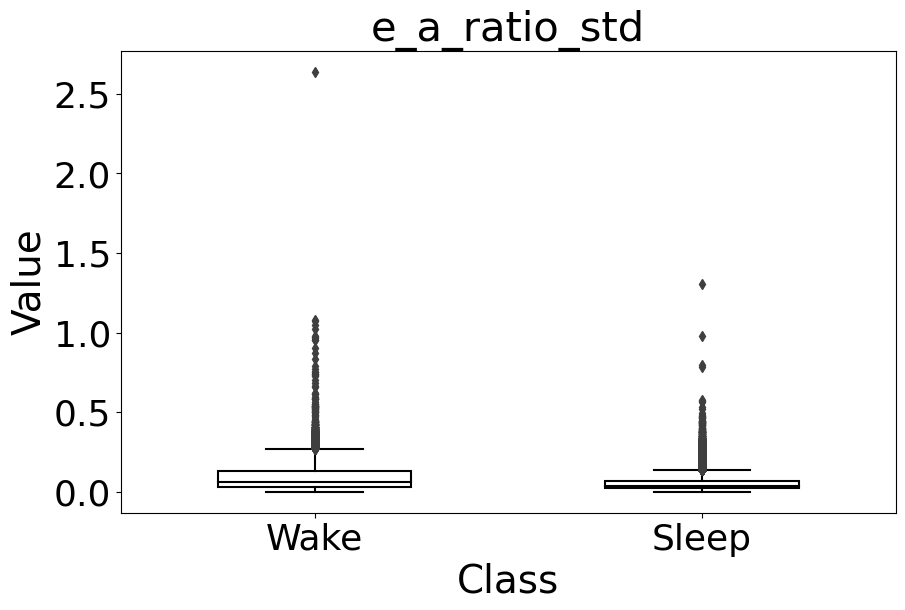

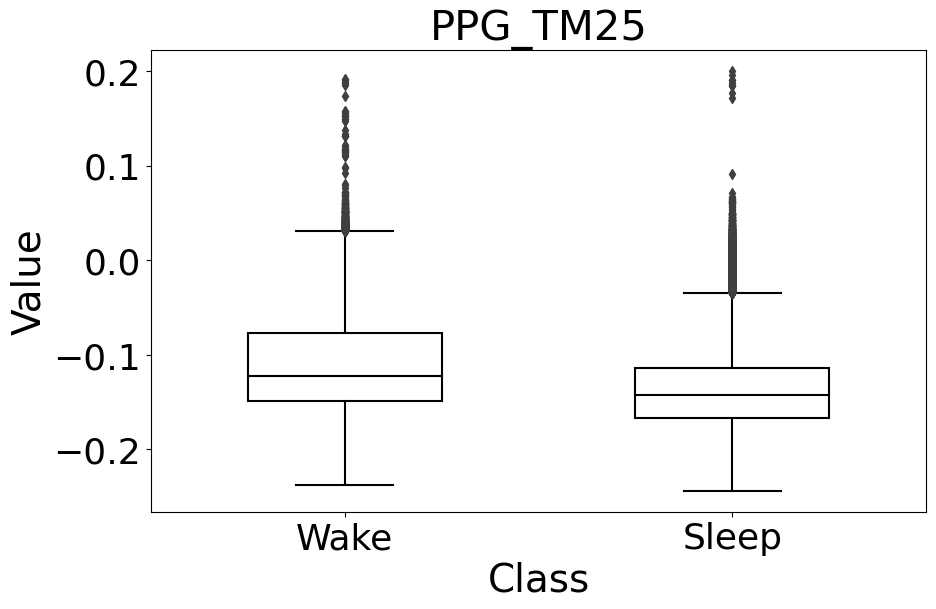

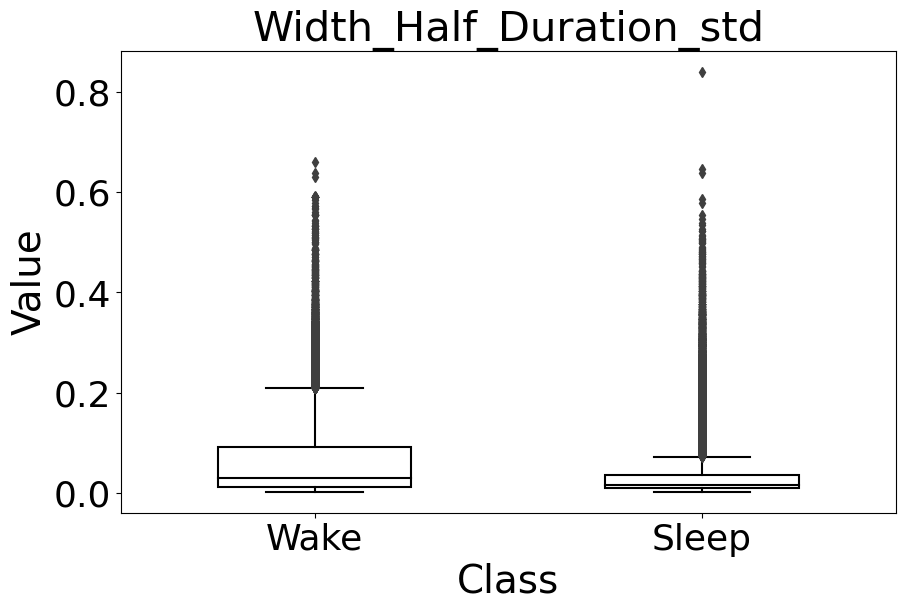

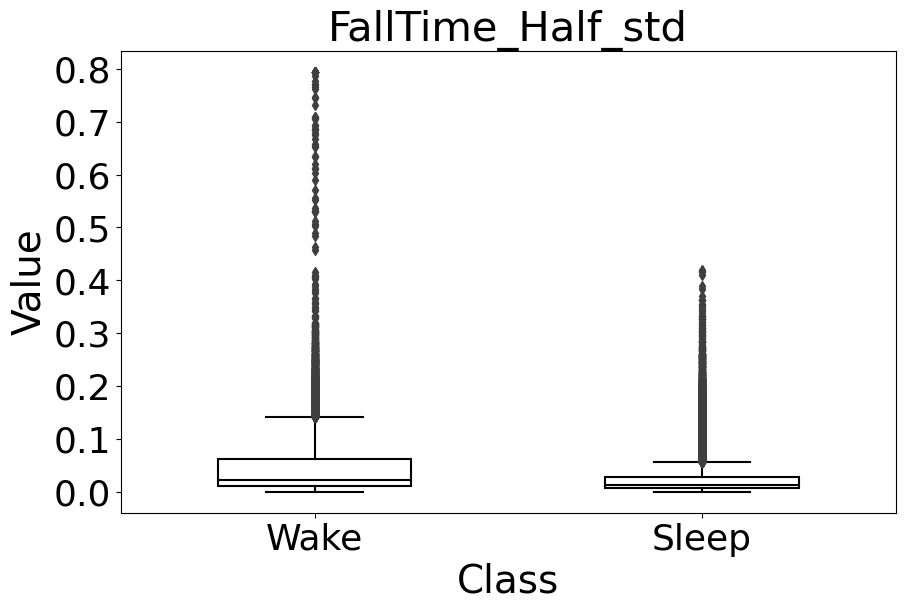

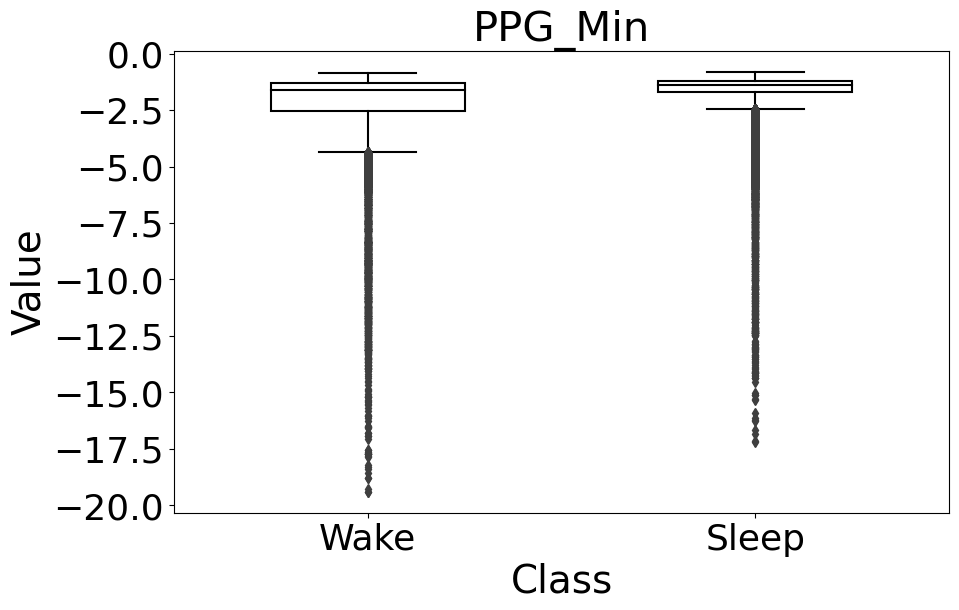

In [36]:
class_mapping = {0: "Wake", 1: "Sleep"}  # Make sure to include all original classes
X_selected_top_20['class'] = y_resampled 
X_selected_top_20['class'] = X_selected_top_20['class'].map(class_mapping)


for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot with correctly specified properties
    sns.boxplot(x='class', y=feature, data=X_selected_top_20,
                width=0.5,  # Box width
                fliersize=5,  # Outlier marker size
                linewidth=1.5,  # Line width of the boxes
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},  # Box fill and edge color
                whiskerprops={'color': 'black'},  # Whisker color
                capprops={'color': 'black'},  # Caps color
                medianprops={'color': 'black'})  # Median line color

    plt.title(f'{feature}', fontsize=30)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()